In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

## Overview of the problem set 

In [27]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [28]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [29]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [30]:
data.data.shape

(569, 30)

In [31]:
data.data[ : ,0]

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.13 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 ,
       13.44 , 10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 13.17 ,
       12.05 , 13.49 , 11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 ,
       19.21 , 14.71 , 13.05 ,  8.618, 10.17 ,  8.598, 14.25 ,  9.173,
       12.68 , 14.78 ,  9.465, 11.31 ,  9.029, 12.78 , 18.94 ,  8.888,
       17.2  , 13.8  , 12.31 , 16.07 , 13.53 , 18.05 , 20.18 , 12.86 ,
       11.45 , 13.34 , 25.22 , 19.1  , 12.   , 18.46 , 14.48 , 19.02 ,
       12.36 , 14.64 , 14.62 , 15.37 , 13.27 , 13.45 , 15.06 , 20.26 ,
       12.18 ,  9.787, 11.6  , 14.42 , 13.61 ,  6.981, 12.18 ,  9.876,
       10.49 , 13.11 , 11.64 , 12.36 , 22.27 , 11.34 ,  9.777, 12.63 ,
      

## Normalizaton of features

In [32]:
X = data.data[ : ,0]
X = X.reshape(569,1)
print(X.shape)
y = data.target
print(y)

(569, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1

## General Architecture of the learning algorithm

A Logistic Regression, using a Neural Network mindset.

For one example $x^{(i)}$: $$z^{(i)} = w^T x^{(i)} + b \tag{1}$$ $$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ $$ \mathcal{L}(a^{(i)}, y^{(i)}) = - y^{(i)} \log(a^{(i)}) - (1-y^{(i)} ) \log(1-a^{(i)})\$$

The cost is then computed by summing over all training examples: 
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\$$

Key steps:

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

The main steps for building a Neural Network:

- Define the model structure (such as number of input features)
- Initialize the model's parameters
- Loop:
        * Calculate current loss (forward propagation)
        * Calculate current gradient (backward propagation)
        * Update parameters (gradient descent)


## Helper functions

In [33]:
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    return sig

In [34]:
def initialize_params(dim):
    
    w = np.zeros((dim,1))
    b = 0
    
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [35]:
def propagate(X,y,w,b):
    
    # forward prop
    m = X.shape[1]
    # calculate the estimated output with the params 
    Z = np.dot(w.T,X) + b 
    # calculate the activation output 
    A = sigmoid(Z) 
    epsilon = 0.001
    

    # negative and zero values 
    for i in range(A.shape[1]):
        if A[0][i]<0 :
            A[0][i]= 0.0001
        
    
    # calculate the cost function 
    cost = (- 1 / m) * np.sum(y * np.log(A) + (1 - y + epsilon) * (np.log(1 - A+ epsilon))) 
   
    
    # backward prop
    dw = (1/m) * np.dot(X,(A-y).T)
    db = (1 / m) * np.sum(A - y)
    
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    grads = {
     'dw' : dw,
     'db' : db
    }
    
    return grads,cost

In [36]:
def optimize(w,b,X,y,alpha,num_iterations ,print_cost=True):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(X,y,w,b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        
        # update params
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 100 == 0:
            costs.append(cost)
            
    
    params = {
    'w' : w, 
    'b' : b
    }
    
    gards = {
    'dw' : dw,
    'db' : db
    }
    
    return params, grads, costs
    

In [37]:
def predict(w,b,X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_prediction

## Merge all functions into a model

In [40]:
def Model (X,y,num_iterations,alpha):
    
   
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    # Initialise params
    w, b = initialize_params(X_train.shape[1])
    
    # Learn the parameters for the model by minimizing the cost 
    params, grads, costs = optimize(w,b,np.transpose(X_train),y_train,alpha,num_iterations ,print_cost=False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = params["w"]
    b = params["b"]
    
          
    
    # Predict outputs
    prediction_train = predict(w, b, np.transpose(X_train)) 
    prediction_test  = predict(w, b, np.transpose(X_test))
    
    # Evaluation 

    print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": prediction_test, 
         "Y_prediction_train" : prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num_iterations}
    
    return d
    
    

In [41]:
d = Model(X,y,2000,0.01)

train accuracy: 83.16582914572865 %
test accuracy: 83.04093567251462 %


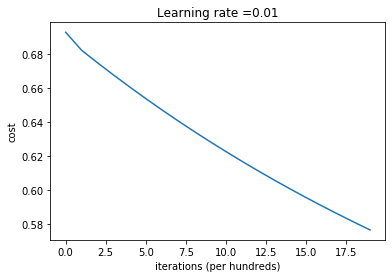

In [42]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [43]:
# One prediction 
p = predict(d['w'],d['b'],X[0].reshape(1,1))
if p == 0:
    print("benign")
else:
    print("malignant")

benign
